In [1]:
server = "https://kr.ublcloud.me"
AuthURL = server +"/rest-auth/login/"

In [43]:
token=None
import requests
import json
from IPython.display import clear_output

url = AuthURL
payload ={
    "username": "nsdevil",
    "password": "Nsdev2021MAy!"
}
r = requests.post(AuthURL, data=payload, headers={'Accept': 'application/json'})
if r.status_code==200: token = json.loads(r.content)['key']; print('LoginSuccess'); 
else: print(r.content) 

LoginSuccess


In [44]:
courses =json.loads(requests.get("https://kr.ublcloud.me/api/v1/courseinfo/?format=json", data=payload, headers={"Authorization": "Token "+token}).content)

In [45]:
len(courses)
# tinyDB to cache
from tinydb import TinyDB, Query
from bs4 import BeautifulSoup

courses_cache = TinyDB('courses_cache.json')

In [83]:
k=None
for course in courses[10:15]:
#     courseinfo = json.loads(requests.get("https://kr.ublcloud.me/api/v1/courseinfo/"+str(courseID),
#                      data=payload, headers={"Authorization": "Token "+token}).content)

    courseID = course['pk']
    '''
    collect chapter attributes and description
    '''
    totalDataFromCourse = []
    chapters = json.loads(requests.get("https://kr.ublcloud.me/api/v1/chapterinfo/?Course_Code="+str(courseID),
                     data=payload, headers={"Authorization": "Token "+token}).content)
    for chapterId in [e['pk'] for e in chapters]:
        r2= requests.get("https://kr.ublcloud.me/api/v1/chaptercontent/"+ str(chapterId),
                         data=payload, headers={"Authorization": "Token "+ token})
#         clear_output(wait=False)
#         print(json.loads(r2.content))
        k= json.loads(r2.content)
        '''
        1. calculate chapterhash to see if it has changed from previous 
           if different hash:
                2. process each of the chapter here
                3. Update texts to datebase
                4. Update hash
        '''
        try:
            for page in k['data']['pages'].values():
            #     clear_output(wait=False)
                try:
                    for i in page[0]['textdiv']:
                        soup = BeautifulSoup(" "+i["content"], "lxml")
#                         soup = BeautifulSoup(k, "lxml")
                        text = soup.get_text() #remove HTML tags
#                         print(text)
#                         print(" "+i["content"]+" ")
                        totalDataFromCourse.append(text+" ")
                except:
                    print("TextDiv Not Found")
        except:
            print("Content Not Found")
        courses_cache.upsert({'courseID': courseID, 'contents': totalDataFromCourse}, Query().courseID == courseID)
#         courses_cache.upsert({'name': 'John', 'logged-in': True}, User.name == 'John')

Content Not Found


In [84]:
courses_cache.search(Query().courseID == 1363)

[{'courseID': 1363, 'contents': []}]

In [87]:
courses_cache.all()
# courses_cache.truncate()

[{'courseID': 1363, 'contents': []},
 {'courseID': 1362, 'contents': ['What is Dialect ']},
 {'courseID': 1361,
  'contents': ['Day 5Assessment in Integrated Curriculum ',
   'How does acid rain affect the plant growth? ',
   'Project Based Learning_ Why, How, and Examples ',
   'How does temperature affect the density of water? ']},
 {'courseID': 1360, 'contents': []},
 {'courseID': 1359, 'contents': ['TPACK illustration ']}]

{'data': {'numberofpages': 3,
  'chaptertitle': '',
  'pages': {'1': [{'textdiv': [],
     'pic': [],
     'stackedpic': [],
     'btn-div': [],
     'pdf': [],
     'ppt': [],
     'video': [{'tops': '0%',
       'left': '0%',
       'width': '98.304%',
       'height': '99.352%',
       'online_link': 'https://player.vimeo.com/video/534314954?title=0&byline=0&portrait=0&speed=0&badge=0&autopause=0&player_id=0&app_id=156032'}],
     'audio': [],
     '_3d': [],
     'quizdiv': [],
     'surveydiv': [],
     'backgroundcolor': 'rgb(255, 255, 255)',
     'thumbnail': ''}],
   '2': [{'textdiv': [],
     'pic': [],
     'stackedpic': [],
     'btn-div': [],
     'pdf': [{'tops': '0%',
       'left': '0%',
       'width': '97.5231%',
       'height': '98.2795%',
       'link': '/media/chapterBuilder/1359/9171/df93cd6e4a854c1f969358d36d92e911______6827.pdf'}],
     'ppt': [],
     'video': [],
     'audio': [],
     '_3d': [],
     'quizdiv': [],
     'surveydiv': [],
     'backgroundcolor'
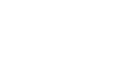
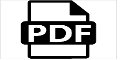
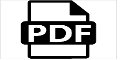

In [86]:
json.loads(r2.content)